In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gplately
from scipy import ndimage


# agegrid_dir = "/Users/ben/Dropbox/USyd/GPlates/SampleData/Rasters/M2020_AgeGrids/"
# agegrid_filename = agegrid_dir + "Muller_etal_2019_Tectonics_v2.0_AgeGrid-{:.0f}.nc"

agegrid_dir = "/Users/ben/Dropbox/USyd/GPlates/"
agegrid_filename = agegrid_dir+"slab_dip/Clennet_AgeGrids_0.1d_masked/seafloor_age_mask_{:.1f}Ma.nc"

# agegrid_dir = "/Users/ben/Dropbox/USyd/GPlates/"
# agegrid_filename = agegrid_dir+"SampleData/1Ga_model/v2/AgeGrids_0.5d/masked/seafloor_age_mask_{:.1f}Ma.nc"

reconstruction_times = np.arange(0,171)

In [2]:
# Call GPlately's DataServer from the download.py module
gdownload = gplately.download.DataServer("Clennett2020")

# Obtain all rotation files, topology features and static polygons from Muller et al. 2019
rotation_model, topology_features, static_polygons = gdownload.get_plate_reconstruction_files()

Checking whether the requested files need to be updated...
Requested files are up-to-date!


In [3]:
model = gplately.PlateReconstruction(rotation_model, topology_features, static_polygons)

# Obtain geometry shapefiles with gdownload
coastlines, continents, COBs = gdownload.get_topology_geometries()

# Call the PlotTopologies object
time = 170 #Ma
gplot = gplately.plot.PlotTopologies(model, coastlines, continents, COBs, time=time)

Checking whether the requested files need to be updated...
Requested files are up-to-date!


(None, None)

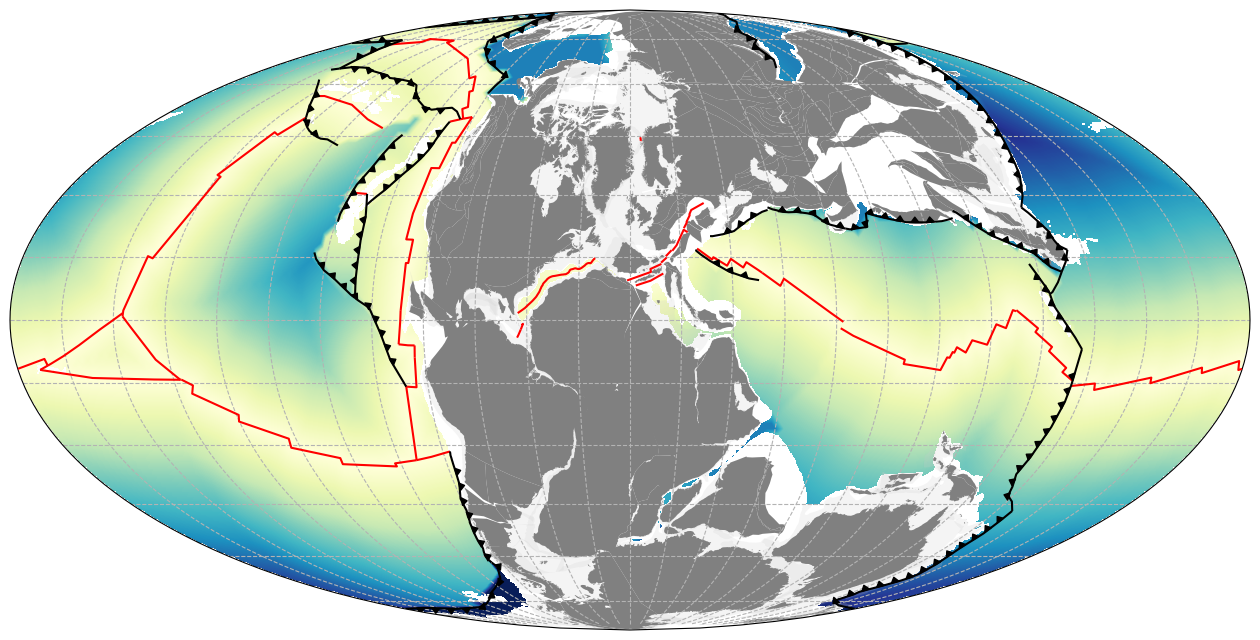

In [4]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))

# read age grid
age_raster = gplately.Raster(filename=agegrid_filename.format(gplot.time))

# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
gplot.plot_grid(ax, age_raster.data, cmap='YlGnBu', vmin=0, vmax=200)
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)


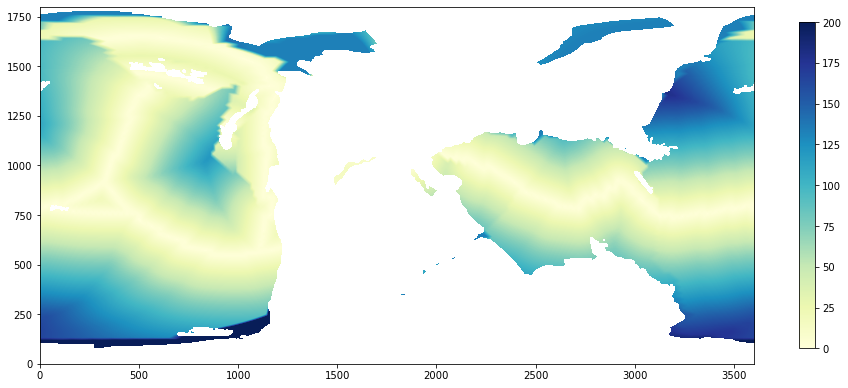

In [5]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(age_raster.data, origin='lower', cmap='YlGnBu', vmin=0, vmax=200)
fig.colorbar(im1, shrink=0.5)

## Edge detection: Sobel

Use the `scipy.ndimage.sobel` filter to identify edges

In [6]:
edge_grid = ndimage.sobel(age_raster.data)

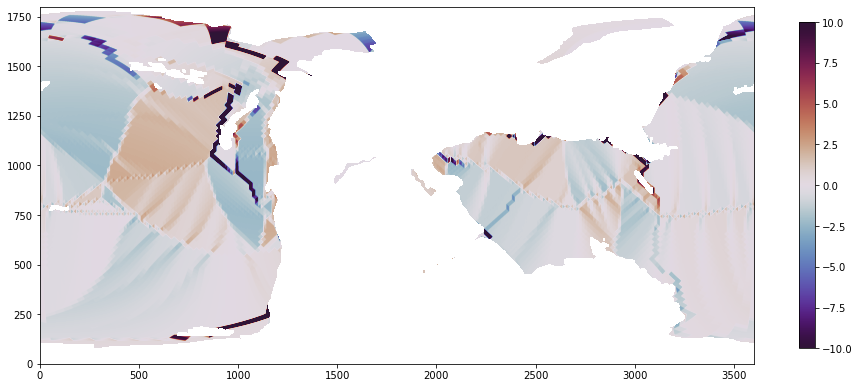

In [7]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(edge_grid, origin='lower', cmap='twilight_shifted', vmin=-10, vmax=10)
fig.colorbar(im1, shrink=0.5)

(None, None)

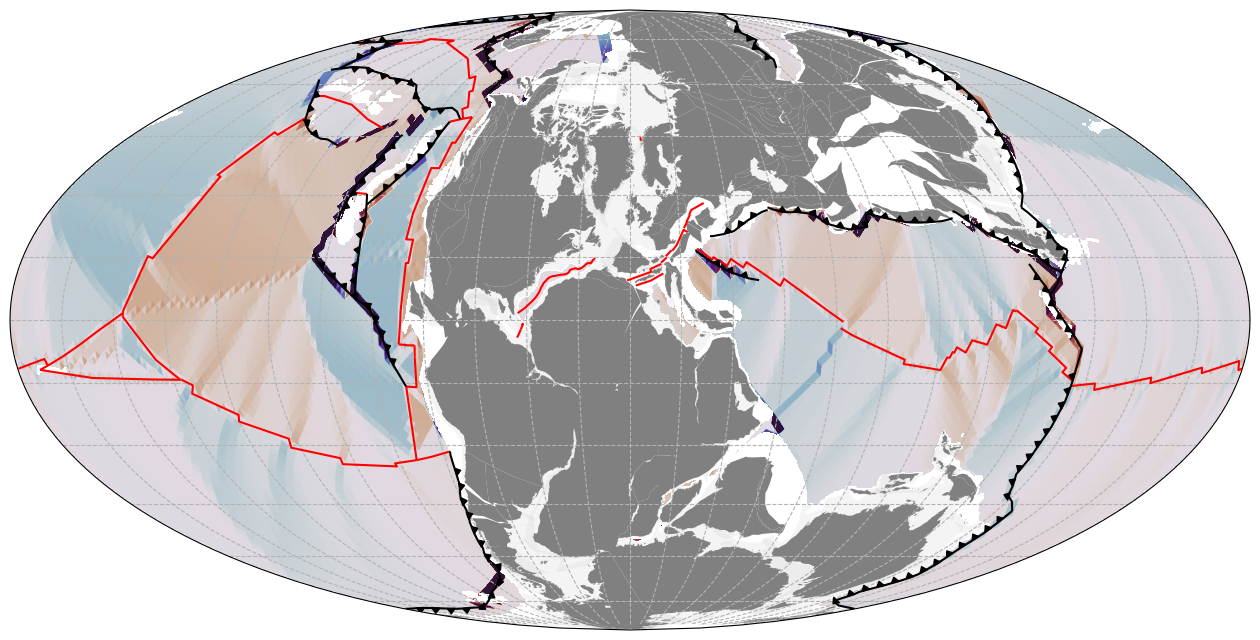

In [8]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))


# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
gplot.plot_grid(ax, edge_grid, origin='lower', cmap='twilight_shifted', vmin=-10, vmax=10)
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)

## Edge detection: Canny

In [9]:
from skimage import feature

In [10]:
edge_grid2 = feature.canny(age_raster.data, )

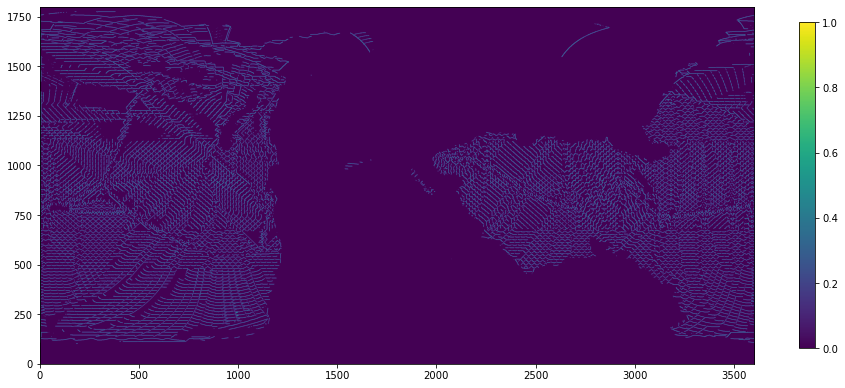

In [11]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(edge_grid2, origin='lower', cmap='viridis')
fig.colorbar(im1, shrink=0.5)

## Edge detection: NumPy gradient

In [12]:
gradX, gradY = np.gradient(age_raster.data)

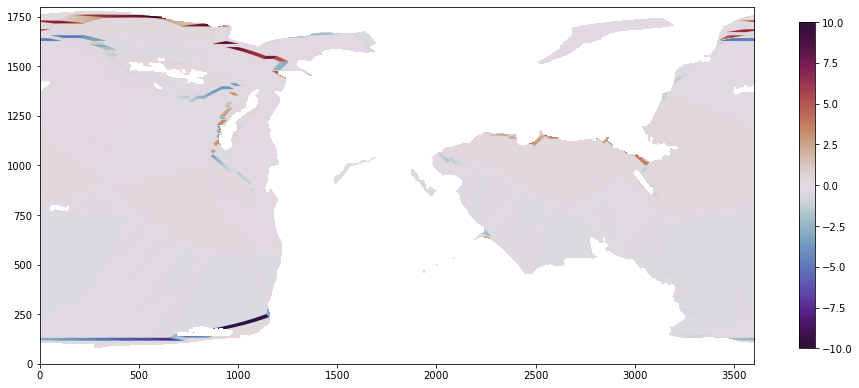

In [13]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(gradX, origin='lower', cmap='twilight_shifted', vmin=-10, vmax=10)
fig.colorbar(im1, shrink=0.5)

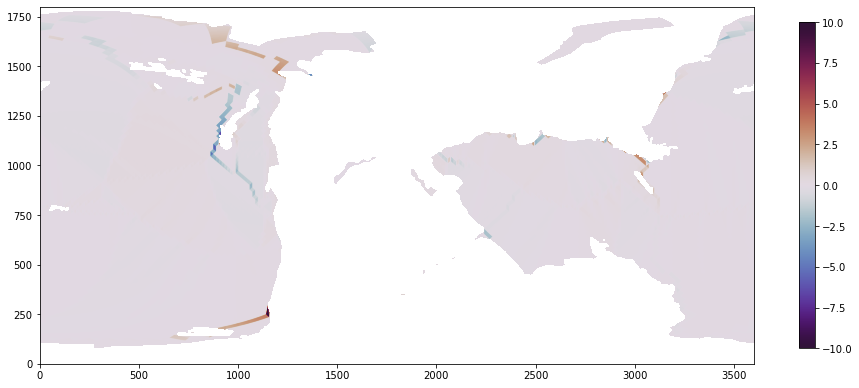

In [14]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(gradY, origin='lower', cmap='twilight_shifted', vmin=-10, vmax=10)
fig.colorbar(im1, shrink=0.5)

In [15]:
gradXY = np.hypot(gradX,gradY)

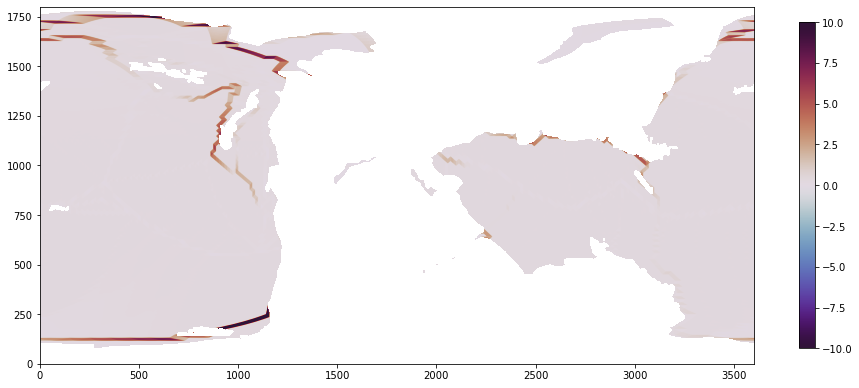

In [16]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(gradXY, origin='lower', cmap='twilight_shifted', vmin=-10, vmax=10)
fig.colorbar(im1, shrink=0.5)

In [17]:
extent_global = [-180,180,-90,90]

def grad(raster):
    image = raster.fill_NaNs(return_array=True)
    gradX, gradY = np.gradient(image, )
    gradXY = np.hypot(gradX, gradY)
#     spacingY = 180/raster.shape[0]
#     cell_area = gplately.tools.lat_area_function(raster.lats, raster.lats+spacingY, raster.lons.size)
#     gradXY /= cell_area.reshape(-1,1) *1e-6
    gradXY[raster.data.mask] = np.nan
    return gradXY

In [18]:
gradXY = grad(age_raster)

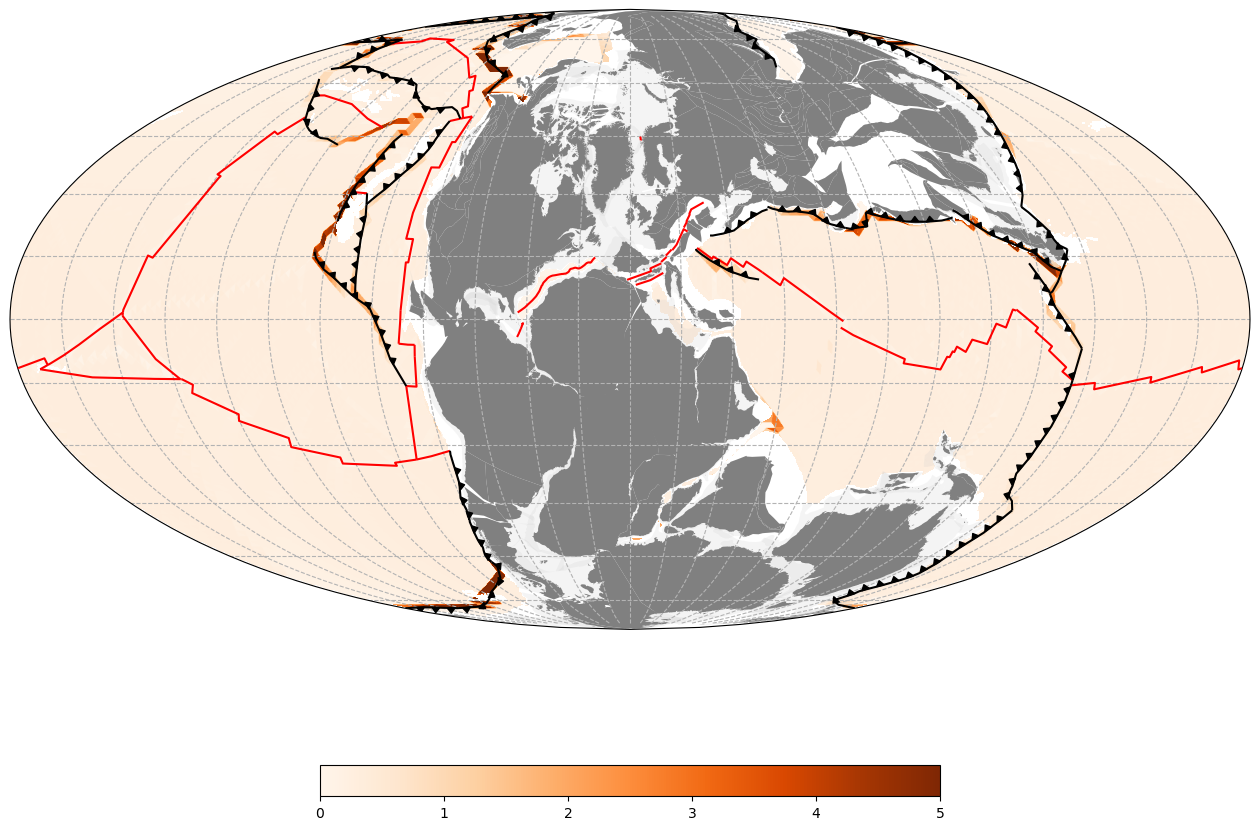

In [19]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))


# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
im = gplot.plot_grid(ax, gradXY, origin='lower', cmap='Oranges', vmin=0, vmax=5)
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)

fig.colorbar(im, shrink=0.5, orientation='horizontal')

## Compare with fracture zones

In [27]:
fz_filename = "/Users/ben/Dropbox/USyd/GPlates/SampleData/FeatureCollections/SeafloorFabric/FZ_cookiecut.gpmlz"



# gplately.geometry.pygplates_to_shapely(fz_filename)
import pygplates
import geopandas as gpd
fz = pygplates.FeatureCollection(fz_filename)

unclassified_feature_lines = gplately.plot.shapelify_feature_lines(fz)
gdf = gpd.GeoDataFrame({"geometry": unclassified_feature_lines}, geometry="geometry")

<GeoAxesSubplot:>

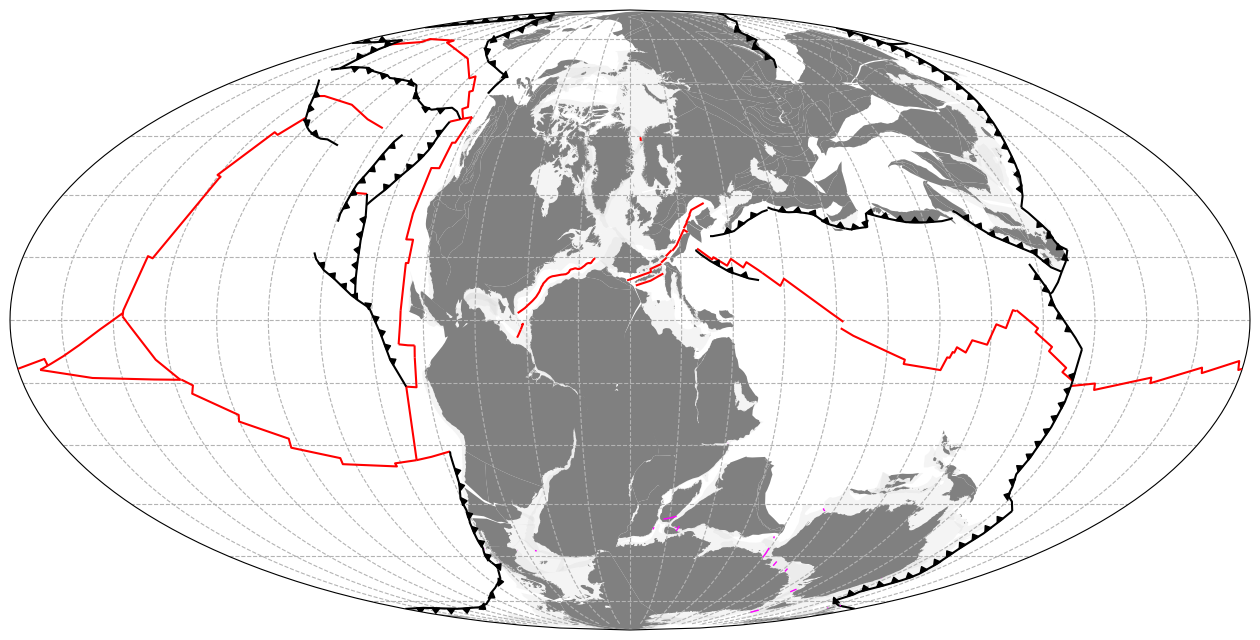

In [26]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))


# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)
gdf.plot(ax=ax, edgecolor='magenta', transform=gplot.base_projection, zorder=11, linewidth=1)

In [22]:
mask_fz = gradXY > 2

fz_grid = np.zeros(mask_fz.shape)
fz_grid[mask_fz] = 1


(None, None)

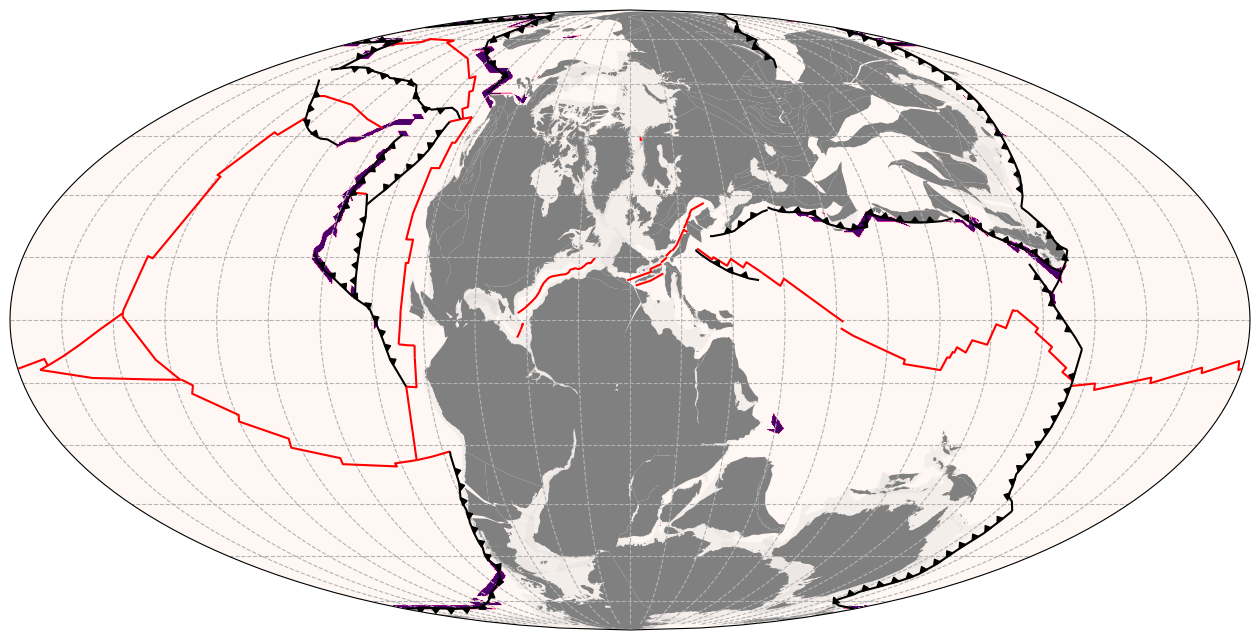

In [23]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))


# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_grid(ax, fz_grid, origin='lower', cmap='RdPu', vmin=0, vmax=1)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)
# gplot.plot_misc_boundaries(ax, color='r', zorder=10)

(None, None)

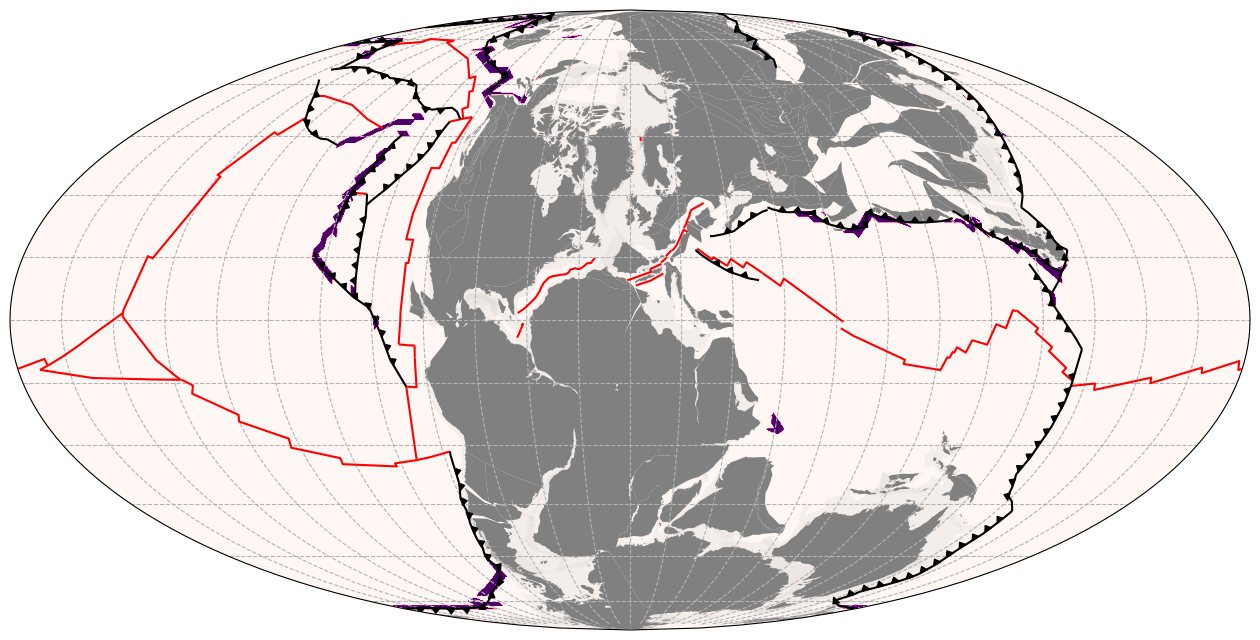

In [24]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))


# Plot shapefile features, subduction zones and MOR boundaries at 50 Ma
gplot.time = time # Ma
# gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_grid(ax, ndimage.binary_dilation(fz_grid, iterations=1), origin='lower', cmap='RdPu', vmin=0, vmax=1)
gplot.plot_continents(ax, facecolor='0.8', alpha=0.2)
gplot.plot_coastlines(ax, color='0.5')
gplot.plot_ridges_and_transforms(ax, color='red', zorder=9)
gplot.plot_trenches(ax, color='k', zorder=9)
gplot.plot_subduction_teeth(ax, color='k', zorder=10)
# gplot.plot_misc_boundaries(ax, color='r', zorder=10)